# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy.stats import linregress
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [172]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [179]:
#defining columns 
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Windspeed=[]
Country=[]
Date=[]
city_weather=[]
x=0
counter=0
import time
url = "http://api.openweathermap.org/data/2.5/weather?"
results=[]
for city in cities:
   try:
        target_url=f"{url}&q={city}&appid={weather_api_key}" 
        data=requests.get(target_url).json()
       
        Lat.append(data["coord"]["lat"])
        Lng.append(data["coord"]["lon"])
         
        Max_Temp.append(1.8*((data["main"]["temp_max"])-273)+32)
        Humidity.append(data["main"]["humidity"])
        Cloudiness.append(data["clouds"]["all"])
        Windspeed.append(data["wind"]["speed"])
        Country.append(data["sys"]["country"])
        Date.append(data["dt"])
        results.append(data)
        city_weather.append(city)
        x=x+1
        counter=counter+1
        if counter==59:
        time.sleep(10)
        counter=0
   
       print(f'printing records {x} of set 1 {city}')
   except (KeyError, IndexError):
        
       print("Missing field/result... skipping.")
   pass
#print(json.dumps(results,indent=2))     
#print(Lat,Lng,Max_Temp,Humidity,Cloudiness,Windspeed,Country,Date)


printing records 1 of set 1 rikitea
printing records 2 of set 1 omboue
printing records 3 of set 1 punta arenas
printing records 4 of set 1 voznesenye
printing records 5 of set 1 port alfred
printing records 6 of set 1 bon accord
printing records 7 of set 1 cabra
printing records 8 of set 1 awjilah
Missing field/result... skipping.
printing records 9 of set 1 molepolole
printing records 10 of set 1 san patricio
printing records 11 of set 1 mataura
Missing field/result... skipping.
printing records 12 of set 1 ushuaia
printing records 13 of set 1 ishim
printing records 14 of set 1 vagur
printing records 15 of set 1 hobart
printing records 16 of set 1 pevek
printing records 17 of set 1 makakilo city
printing records 18 of set 1 nikolskoye
printing records 19 of set 1 dikson
printing records 20 of set 1 avarua
printing records 21 of set 1 kruisfontein
printing records 22 of set 1 kyaikto
printing records 23 of set 1 tautira
printing records 24 of set 1 butaritari
printing records 25 of se

printing records 199 of set 1 rivadavia
printing records 200 of set 1 yerofey pavlovich
printing records 201 of set 1 sao felix do xingu
printing records 202 of set 1 rosarito
printing records 203 of set 1 las vegas
printing records 204 of set 1 mar del plata
printing records 205 of set 1 visnes
printing records 206 of set 1 manta
printing records 207 of set 1 san matias
printing records 208 of set 1 yining
printing records 209 of set 1 coihaique
printing records 210 of set 1 niamey
printing records 211 of set 1 haldwani
printing records 212 of set 1 jalu
printing records 213 of set 1 adeje
printing records 214 of set 1 kondopoga
printing records 215 of set 1 chuy
printing records 216 of set 1 lebu
printing records 217 of set 1 roald
printing records 218 of set 1 nemuro
Missing field/result... skipping.
printing records 219 of set 1 dingle
printing records 220 of set 1 todos santos
printing records 221 of set 1 adre
printing records 222 of set 1 mahanoro
printing records 223 of set 1 k

printing records 396 of set 1 torbay
printing records 397 of set 1 saveh
printing records 398 of set 1 saint-raymond
printing records 399 of set 1 balkanabat
printing records 400 of set 1 sao filipe
Missing field/result... skipping.
printing records 401 of set 1 stokmarknes
printing records 402 of set 1 vengerovo
printing records 403 of set 1 yatou
printing records 404 of set 1 fort william
printing records 405 of set 1 kohlu
printing records 406 of set 1 la paz
printing records 407 of set 1 puerto madero
printing records 408 of set 1 bosaso
printing records 409 of set 1 juneau
Missing field/result... skipping.
printing records 410 of set 1 bathsheba
Missing field/result... skipping.
printing records 411 of set 1 buala
printing records 412 of set 1 sansepolcro
printing records 413 of set 1 kolda
printing records 414 of set 1 smithers
printing records 415 of set 1 teguldet
printing records 416 of set 1 miri
printing records 417 of set 1 awbari
printing records 418 of set 1 san sebastian

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [261]:
cities_info=pd.DataFrame({"City":city_weather,"Lat":Lat,"Lng":Lng,"Max_Temp":Max_Temp,"Humidity":Humidity,
                         "Cloudiness":Cloudiness,"Windspeed":Windspeed,"Country":Country,"Date":Date})

cities_info.to_csv("../output_data/cities_info.csv",index=None)       
cities_info.head()



,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,rikitea,-23.1203,-134.9692,75.128,58,80,6.85,PF,1621111783
1,omboue,-1.5746,9.2618,78.350,89,75,2.76,GA,1621111968
2,punta arenas,-53.1500,-70.9167,46.670,93,90,5.14,CL,1621111779
3,voznesenye,61.0106,35.4781,49.424,99,100,1.34,RU,1621111968
4,port alfred,-33.5906,26.8910,64.220,83,89,2.82,ZA,1621111772


In [224]:
s=cities_info[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Windspeed","Date"]]
s.describe()             

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Windspeed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.169437,18.108772,64.865329,68.634276,51.595406,3.572827,1.621112e+09
std,33.587650,88.567095,17.303774,21.820803,37.870911,2.334234,1.879695e+02
min,-54.800000,-179.166700,7.754000,5.000000,0.000000,0.120000,1.621111e+09
25%,-8.157300,-60.304625,52.295000,56.000000,15.000000,1.850000,1.621112e+09
50%,21.404050,22.025000,67.568000,73.000000,52.000000,3.090000,1.621112e+09
75%,48.907275,95.298725,78.300500,86.000000,90.000000,4.630000,1.621112e+09
max,78.218600,178.416700,104.270000,100.000000,100.000000,16.200000,1.621112e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [225]:
humid=cities_info.loc[cities_info["Humidity"]>100]
humid

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [226]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

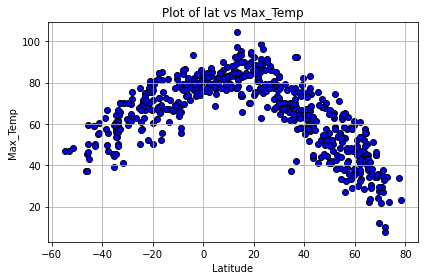

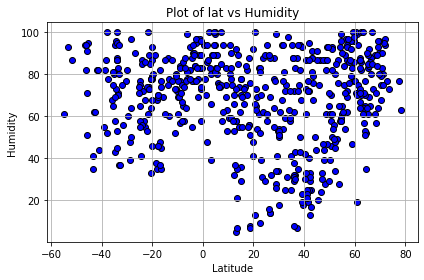

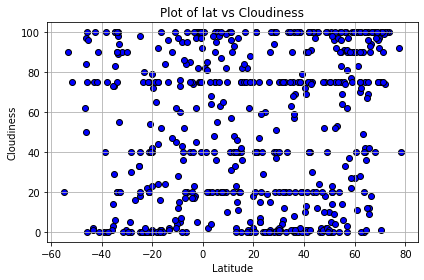

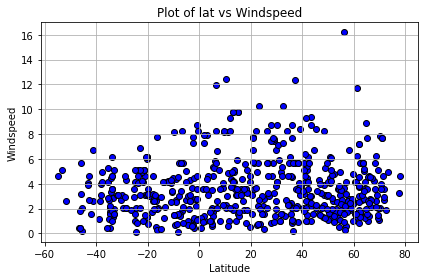

In [243]:
#looping through the plots
col_choice = [cities_info["Max_Temp"],cities_info["Humidity"],cities_info["Cloudiness"],cities_info["Windspeed"]]
for pos, axis1 in enumerate(col_choice):   # Pick a first col
    f=plt.scatter(cities_info["Lat"],axis1,marker="o",facecolors="blue",edgecolors="black")
    plt.title(f"Plot of lat vs {axis1.name}")
    plt.xlabel(f"Latitude")
    plt.ylabel(f"{axis1.name}")
    plt.grid()
    plt.tight_layout()
    plt.show()
    


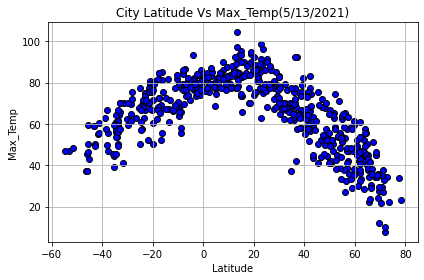

In [245]:
#Latitude Vs Temp
plt.scatter(cities_info["Lat"],cities_info["Max_Temp"],marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude Vs Max_Temp(5/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max_Temp")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_Temp.png")
plt.show()



Remark: The Plot shows how the temp increases as we go from Negative latitudes towards 0(equator)and decreases as move towards higher positve values(basically near poles)

## Latitude vs. Humidity Plot

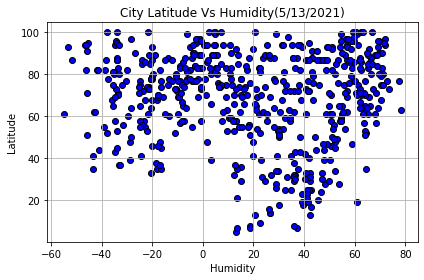

In [246]:

plt.scatter(cities_info["Lat"],cities_info["Humidity"],marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude Vs Humidity(5/13/2021)")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/humidity_Temp.png")
plt.show()

Remark: Values are sacttered all over the place. Nothing conclusive can be said about this graph.

## Latitude vs. Cloudiness Plot

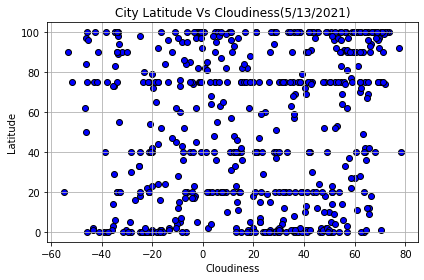

In [248]:

plt.scatter(cities_info["Lat"],cities_info["Cloudiness"],marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude Vs Cloudiness(5/13/2021)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/cloudiness_Temp.png")
plt.show()

Remark: scatter plot shows weak or no relatiodhip between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

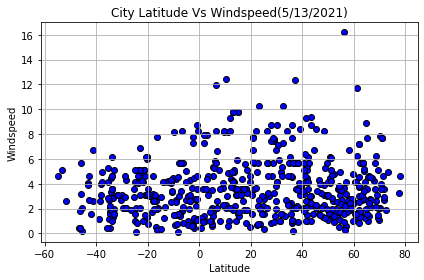

In [251]:

plt.scatter(cities_info["Lat"],cities_info["Windspeed"],marker="o",facecolors="blue",edgecolors="black")
plt.title("City Latitude Vs Windspeed(5/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Windspeed_Temp.png")
plt.show()

Remark:there seems little to no relationship between Cloudiness and Windspeed.

## Linear Regression

In [229]:
#The second requirement is to run linear regression on each relationship. 
#This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude)
northern=cities_info.loc[cities_info["Lat"]>=0]
northern.head()
southern=cities_info.loc[cities_info["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.8600880729723226


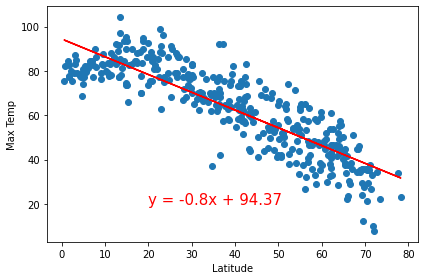

In [253]:
correlation = st.pearsonr(northern["Lat"],northern["Max_Temp"])
cor_Temp_Lat=correlation[0]
print(cor_Temp_Lat)


#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Max_Temp"])

#creating the regress equation
regress_values =  northern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(northern["Lat"],northern["Max_Temp"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()
plt.savefig("../output_data/cor_north_Temp.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7688950500297984


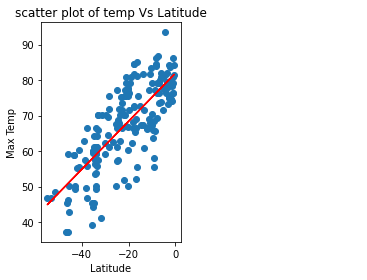

In [254]:
correlation = st.pearsonr(southern["Lat"],southern["Max_Temp"])
cor_Temp_Lat=correlation[0]
print(cor_Temp_Lat)


#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Max_Temp"])

#creating the regress equation
regress_values =  southern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(southern["Lat"],southern["Max_Temp"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("scatter plot of temp Vs Latitude")
plt.tight_layout()
plt.savefig("../output_data/cor_south_Temp.png")
plt.show()

Remark:Scatter Plot(Northern) and the strong negative Coreraltion of -0.86 shows that in the northern hemisphere as the latitude increase, the Max temp decreases.this is very much obvious as the values of lat increase from 0 as we go up in the north.
Point(2). Negative lattitude value indicates Southern hemisphere.Strong positive corelation indicates that temp inc as we go towards positive value that means towards equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.11523813070944447


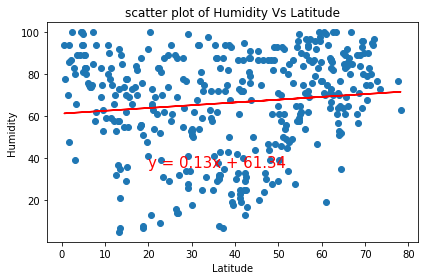

In [255]:
correlation = st.pearsonr(northern["Lat"],northern["Humidity"])
cor_humidity_Lat=correlation[0]
print(cor_humidity_Lat)


#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Humidity"])

#creating the regress equation
regress_values =  northern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(northern["Lat"],northern["Humidity"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("scatter plot of Humidity Vs Latitude")
plt.tight_layout()
plt.savefig("../output_data/cor_north_humid.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.126355439216367


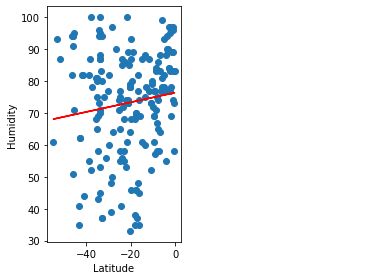

In [256]:
correlation = st.pearsonr(southern["Lat"],southern["Humidity"])
cor_humid_Lat=correlation[0]
print(cor_humid_Lat)

#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Humidity"])

#creating the regress equation
regress_values =  southern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(southern["Lat"],southern["Humidity"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
plt.savefig("../output_data/cor_south_humid.png")
plt.show()

Remark:Humidity and Latitude shows very weak corealtion factor indicating that lattitude has very little effect on humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.19772605135271676


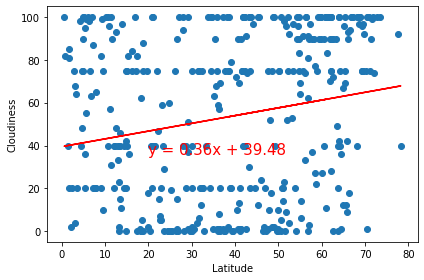

In [257]:
correlation = st.pearsonr(northern["Lat"],northern["Cloudiness"])
cor_cloud_Lat=correlation[0]
print(cor_cloud_Lat)

#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Cloudiness"])

#creating the regress equation
regress_values =  northern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(northern["Lat"],northern["Cloudiness"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
plt.savefig("../output_data/cor_north_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.02349128577415025


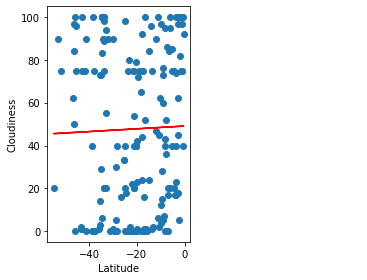

In [258]:
correlation = st.pearsonr(southern["Lat"],southern["Cloudiness"])
cor_cloud_Lat=correlation[0]
print(cor_cloud_Lat)

#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Cloudiness"])

#creating the regress equation
regress_values =  southern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(southern["Lat"],southern["Cloudiness"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
plt.savefig("../output_data/cor_south_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.09492966968791428


C:\Users\Saumy\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


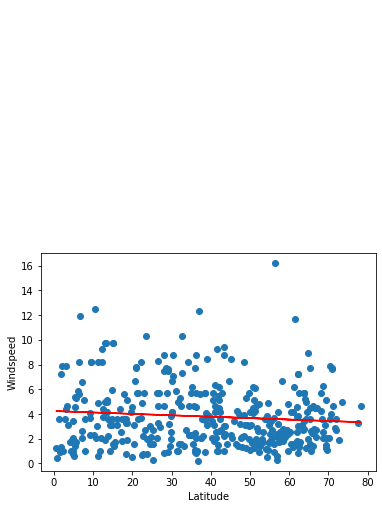

In [259]:
correlation = st.pearsonr(northern["Lat"],northern["Windspeed"])
cor_wind_Lat=correlation[0]
print(cor_wind_Lat)

#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Windspeed"])

#creating the regress equation
regress_values =  northern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(northern["Lat"],northern["Windspeed"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.tight_layout()
plt.savefig("../output_data/cor_north_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.042216199182500434


C:\Users\Saumy\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


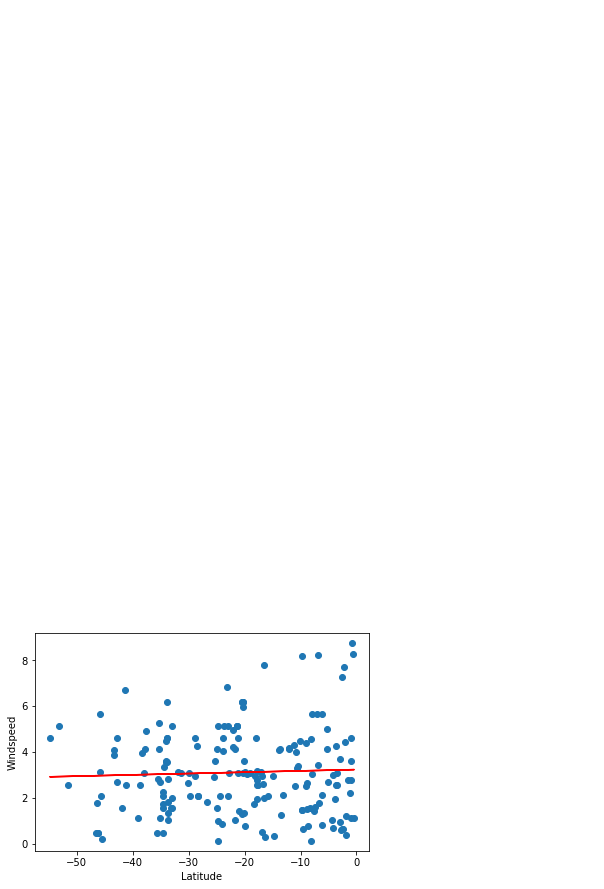

In [260]:
correlation = st.pearsonr(southern["Lat"],southern["Windspeed"])
cor_Temp_Lat=correlation[0]
print(cor_Temp_Lat)

#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Windspeed"])

#creating the regress equation
regress_values =  southern["Lat"]* slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(southern["Lat"],southern["Windspeed"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.tight_layout()
plt.savefig("../output_data/cor_south_wind.png")
plt.show()

Remark:Considering the low values of Correlation, we can say that lat have no/very weak effct on cloudiness.